# An introductional notebook to HEP analysis in C++

<p>In this notebook you can find an easy set of commands that show some basic computing techniques commonly used in High Energy Physics (HEP) analyzes.</p>

<p>It also shows how to create an histogram, fill it and draw it. Moreover it is an introduction to [ROOT](https://root.cern.ch/) too. The final output is a plot with the number of leptons.</p>

Based on ATLAS opendata notebooks (http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html)


The library used is [ROOT](https://root.cern.ch/), a scientific data analysis software framework that provides a large set of functionalities needed to deal with big data processing, statistical analysis, visualisation and storage.

<p>At first we have to include several helpers that will support our analysis:</p>

In [1]:
#include <iostream>
#include <string>
#include <stdio.h>
//#include <math.h>

Next we have to open the data that we want to analyze. As described above the data is stored in a _*.root_ file. This is a root file containing tracks and calorimeter clusters

In [2]:
TFile *file = TFile::Open("Data_8TeV.root"); 

The next step is to define a tree named _tree_ to get the data out of the _*.root_ file. The tree in this root file is called "JetRecoTree". We will then print the contents of the tree to find the names of the variables. 

In [3]:
TTree *tree = (TTree*) file->Get("mini");
tree->Print("1")

******************************************************************************
*Tree    :mini      : 4-vectors + variables required for scaling factors     *
*Entries : 14945674 : Total =      3737586466 bytes  File  Size = 1366006484 *
*        :          : Tree compression factor =   2.74                       *
******************************************************************************
*Br    0 :runNumber : runNumber/I                                            *
*Entries : 14945674 : Total  Size=   59789737 bytes  File Size  =     297928 *
*Baskets :       70 : Basket Size=    1224192 bytes  Compression= 200.68     *
*............................................................................*
*Br    1 :eventNumber : eventNumber/I                                        *
*Entries : 14945674 : Total  Size=   59789885 bytes  File Size  =   44412272 *
*Baskets :       70 : Basket Size=    1224192 bytes  Compression=   1.35     *
*...................................................

In [4]:
TFile *file2 = TFile::Open("ttbar_8TeV.root"); 
TTree *tree2 = (TTree*) file2->Get("mini");
tree2->Print("2") // si lo dejo abajo muere al correr

******************************************************************************
*Tree    :mini      : 4-vectors + variables required for scaling factors     *
*Entries :  1500000 : Total =       567791759 bytes  File  Size =  300057248 *
*        :          : Tree compression factor =   1.89                       *
******************************************************************************
*Br    0 :runNumber : runNumber/I                                            *
*Entries :  1500000 : Total  Size=    6002049 bytes  File Size  =      31136 *
*Baskets :       18 : Basket Size=     790016 bytes  Compression= 192.75     *
*............................................................................*
*Br    1 :eventNumber : eventNumber/I                                        *
*Entries :  1500000 : Total  Size=    6002093 bytes  File Size  =    3819950 *
*Baskets :       18 : Basket Size=     790016 bytes  Compression=   1.57     *
*...................................................

Activate variables 

In [5]:
Float_t mcWeight;
Bool_t e_trig;
Bool_t mu_trig;
Bool_t good_vtx;
UInt_t lep_n;
UInt_t jet_n;
Float_t MET;
Float_t MET_phi;

Float_t lep_pt[10];  
Float_t lep_eta[10];  
Float_t lep_phi[10];  
Float_t lep_E[10];  
Int_t lep_type[10];  
Float_t lep_ptcone30[10];
Float_t lep_etcone20[10];

Float_t jet_pt[10]; 
Float_t jet_Eta[10]; 
Float_t jet_jvf[10]; 
Float_t jet_mv1[10];
//vector<float> *jet_eta;

tree->SetBranchAddress("trigE", &e_trig);
tree->SetBranchAddress("trigM", &mu_trig);
tree->SetBranchAddress("hasGoodVertex", &good_vtx);
tree->SetBranchAddress("lep_n", &lep_n);
tree->SetBranchAddress("jet_n", &jet_n);
tree->SetBranchAddress("met_et", &MET);
tree->SetBranchAddress("met_phi", &MET_phi);

tree->SetBranchAddress("lep_pt", &lep_pt);
tree->SetBranchAddress("lep_eta", &lep_eta);
tree->SetBranchAddress("lep_phi", &lep_phi);
tree->SetBranchAddress("lep_E", &lep_E);
tree->SetBranchAddress("lep_type", &lep_type);
tree->SetBranchAddress("lep_ptcone30", &lep_ptcone30);
tree->SetBranchAddress("lep_etcone20", &lep_etcone20);

tree->SetBranchAddress("jet_pt", &jet_pt);

tree->SetBranchAddress("mcWeight", &mcWeight);

tree->SetBranchAddress("jet_eta", &jet_Eta);
tree->SetBranchAddress("jet_jvf", &jet_jvf);
tree->SetBranchAddress("jet_MV1", &jet_mv1);

Create Canvas

In [6]:
TCanvas *canvas = new TCanvas("Canvas","",800,600);

Create histograms: Leading jet pT and all jets pT 

In [7]:
TH1F *cutflow = new TH1F("Cutflow","Cutflow; Cut; Events",20,0,10);
TH1F *hist_njets = new TH1F("Number of jets","n-jets; Jet multiplicity; Events",20,0,10);

In [8]:
TH1F *Hist_lepton_pt = new TH1F("lepton_pt","lepton_pt (GeV); pt; Events",200,0,200);
TH1F *Hist_TrackIsolation = new TH1F("TrackIsolation","TrackIsolation; ptcone30/pt; Events",100,0,8);
TH1F *Hist_Lep_Calorimeter_isolation = new TH1F("Lep_Calorimeter_isolation","Lep_Calorimeter_isolation; etcone20/pt; Events",100,0,0.8);
TH1F *Hist_lepton_eta = new TH1F("lepton_eta","lepton_eta; lepton_eta; Events",100,-3,3);


TH1F *Hist_jet_pt = new TH1F("jet_pt","jet_pt; jet_pt (GeV); Events",100,0,300);
TH1F *Hist_jet_eta = new TH1F("jet_eta","jet_eta; lepton_eta; Events",100,-3,3);
TH1F *Hist_jet_jvf = new TH1F("jet_jvf","jet_jvf; jet_jvf; Events",100,0,1.2);
TH1F *Hist_jet_mv1 = new TH1F("jet_mv1","jet_mv1; jet_mv1; Events",100,0,1.2);

TH1F *Hist_b_jets = new TH1F("b_jets","b_jets; b_jets; Events",100,0,10);
TH1F *Hist_MET = new TH1F("MET","MET; MET; Events",100,0,200);
TH1F *Hist_mtW = new TH1F("mtW","mtW; mtW; Events",100,0,200);



In [9]:
TH1F *cutflow_after = new TH1F("Cutflow_after","Cutflow; Cut; Events",20,0,10);
TH1F *hist_njets_after = new TH1F("Number of jets_after","n-jets; Jet multiplicity; Events",20,0,10);
TH1F *Hist_lepton_pt_after = new TH1F("lepton_pt_after","lepton_pt (GeV); pt; Events",200,0,200);
TH1F *Hist_TrackIsolation_after = new TH1F("TrackIsolation_after","TrackIsolation; ptcone30/pt; Events",100,0,0.8);
TH1F *Hist_Lep_Calorimeter_isolation_after = new TH1F("Lep_Calorimeter_isolation_after","Lep_Calorimeter_isolation; etcone20/pt; Events",100,0,0.8);
TH1F *Hist_lepton_eta_after = new TH1F("lepton_eta_after","lepton_eta; lepton_eta; Events",100,-3,3);
TH1F *Hist_jet_pt_after = new TH1F("jet_pt_after","jet_pt; jet_pt (GeV); Events",100,0,300);
TH1F *Hist_jet_eta_after = new TH1F("jet_eta_after","jet_eta; lepton_eta; Events",100,-3,3);
TH1F *Hist_jet_jvf_after = new TH1F("jet_jvf_after","jet_jvf; jet_jvf; Events",100,0,1.2);
TH1F *Hist_jet_mv1_after = new TH1F("jet_mv1_after","jet_mv1; jet_mv1; Events",100,0,1.2);
TH1F *Hist_b_jets_after = new TH1F("b_jets_after","b_jets; b_jets; Events",100,0,10);
TH1F *Hist_MET_after = new TH1F("MET_after","MET; MET; Events",100,0,200);
TH1F *Hist_mtW_after = new TH1F("mtW_after","mtW; mtW; Events",100,0,200);

Hist_lepton_pt_after 
Hist_TrackIsolation_after 
Hist_Lep_Calorimeter_isolation_after 
Hist_lepton_eta_after 
Hist_jet_pt_after  
Hist_jet_eta_after 
Hist_jet_jvf_after
Hist_jet_mv1_after
Hist_b_jets_after 
Hist_MET_after 
Hist_mtW_after 

Loop and fill histograms

In [10]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

int cut1 = 0;
int cut2 = 0;
int cut3 = 0;
int cut4 = 0;
int cut5 = 0;
int cut6 = 0;
int cut7 = 0;
int cut8 = 0;

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   

    //First cut: Good vertex
    if(!good_vtx) continue;
    cut1++;
    cutflow->Fill(1);

    //Second cut: Trigger
    if(!e_trig && !mu_trig) continue;
    cut2++;
    cutflow->Fill(2);
        
    // Preselection of good leptons                                                                                
    int n_mu=0;
    int n_el=0;
    int n_lep=0;
    
    int misst=0; //conteo de los de energia perdida
    

    //Loop over leptons
    for(unsigned int i=0; i<lep_n; i++){ 
        
        Hist_lepton_pt->Fill(lep_pt[i]/1000);
           
        Hist_TrackIsolation ->Fill(lep_ptcone30[i]/lep_pt[i]);
        Hist_Lep_Calorimeter_isolation ->Fill(lep_etcone20[i]/lep_pt[i]);
        Hist_lepton_eta ->Fill(lep_eta[i]);
        
        if( lep_pt[i] < 25000.) continue; 
        if( lep_ptcone30[i]/lep_pt[i] > 0.15 ) continue; 
        if( lep_etcone20[i]/lep_pt[i] > 0.15 ) continue;  
        if( lep_type [i]==13 && TMath::Abs(lep_eta[i]) < 2.5 ){n_mu++;n_lep++;
        }
        /*
        To complete: Add electrons and extract the index for the good lepton
        */
        if( lep_type [i]==11 && (TMath::Abs(lep_eta[i]) < 1.37 || TMath::Abs(lep_eta[i])> 1.52) && TMath::Abs(lep_eta[i]) < 2.47 )
        { n_el++;n_lep++;  
        }


    }
//    n_lep = n_mu + n_el;
    //Third cut (one good lepton):
    if(n_lep!=1) continue;

    cutflow->Fill(3); 
    cut3++;
    
    int n_jets=0;
    int n_bjets=0;
    
    hist_njets->Fill(jet_n);  //Number of jets distribution


    Hist_MET->Fill(MET/1000) ;
    
    
    TLorentzVector Lepton  = TLorentzVector();
    TLorentzVector  MeT  = TLorentzVector();

    
    Lepton.SetPtEtaPhiE(lep_pt[0],lep_eta[0],lep_phi[0],lep_E[0]); 
    MeT.SetPtEtaPhiE(MET,0,MET_phi,MET); 
    //To complete: Lorentz vectors for the lepton and MET. Use SetPtEtaPhiE().

// Calculation of the mTW using TLorentz vectors             
    float mTW = sqrt(2*Lepton.Pt()*MeT.Et()*(1-cos(Lepton.DeltaPhi(MeT))));

    Hist_mtW ->Fill(mTW/1000) ;
    
    
    
    for(unsigned k=0; k<jet_n; k++){ //llenemos primero los histogramas ANTES del cut
         

    Hist_jet_pt  ->Fill(jet_pt[k]/1000); 
    Hist_jet_eta ->Fill(jet_Eta[k]); 
    Hist_jet_jvf ->Fill(jet_jvf[k]); 
    Hist_jet_mv1 ->Fill(jet_mv1[k]); 
    }
    
    //Fourth cut: At least 4 jets
    if(jet_n<4) continue; 
    cutflow->Fill(4); 
    cut4++;
    
    
    for(unsigned int j=0; j<jet_n; j++){ //llenemos primero los histogramas ANTES del cut
         
        // To complete: apply jet cuts to find the good jets
        if(jet_pt[j] < 25000. ) continue;
      if(TMath::Abs(jet_Eta[j]) > 2.5 ) continue;   
        //Eta cut
        if(TMath::Abs(jet_Eta[j]) <= 2.4 && jet_pt[j] <= 50000. && jet_jvf[j] < 0.5) continue;
        // JVF cleaning -- cut on 0.7892 MV1 and count the number of b-jets -- if(jet_mv1[j] > 0.7892) continue; //esto para los b 
        n_jets++;
        if(jet_mv1[j] > 0.7892){n_bjets++;}
        }
    
    Hist_b_jets->Fill(n_bjets);  
    //Fifth cut: At least 4 good jets
    if(n_jets<4) continue; 
    cutflow->Fill(5); 
    cut5++;
    
    //Sixth cut: at least TWO b-jet
    if(n_bjets<2) continue;
    cutflow->Fill(6); 
    cut6++;
    
    //Seventh cut: MET > 30 GeV
    if(MET<30000.) continue;
    cutflow->Fill(7); 
    cut7++;                                                           

    //Eight cut: mTW > 30 GeV
    if(mTW < 30000.) continue;
    cutflow->Fill(8); 
    cut8++;
 
    // voy a llenar los histogrammas luego de los cortes
    hist_njets_after->Fill(jet_n,1);  
    Hist_MET_after->Fill(MET/1000,1) ;
    Hist_mtW_after ->Fill(mTW/1000,1) ;
    Hist_b_jets_after ->Fill(n_bjets,1);  

    //leptones
    for(unsigned int l=0; l<lep_n; l++){ 
        
        if( lep_pt[l] < 25000.) continue; 
        if( lep_ptcone30[l]/lep_pt[l] > 0.15 ) continue; 
        if( lep_etcone20[l]/lep_pt[l] > 0.15 ) continue;  
        if( lep_type [l]==13 && TMath::Abs(lep_eta[l]) < 2.5 ){
        Hist_lepton_pt_after->Fill(lep_pt[l]/1000.,1.0);    
        Hist_TrackIsolation_after ->Fill(lep_ptcone30[l]/lep_pt[l],1);
        Hist_Lep_Calorimeter_isolation_after ->Fill(lep_etcone20[l]/lep_pt[l],1);
        Hist_lepton_eta_after ->Fill(lep_eta[l],1);            
        }
        if( lep_type [l]==11 && (TMath::Abs(lep_eta[l]) < 1.37 || TMath::Abs(lep_eta[l])> 1.52) && TMath::Abs(lep_eta[l]) < 2.47 )
        { 
        Hist_lepton_pt_after->Fill(lep_pt[l]/1000.,1.0);  
        Hist_TrackIsolation_after ->Fill(lep_ptcone30[l]/lep_pt[l],1);
        Hist_Lep_Calorimeter_isolation_after ->Fill(lep_etcone20[l]/lep_pt[l],1);
        Hist_lepton_eta_after ->Fill(lep_eta[l],1);            
        }
    }
        //Jets 
        for(unsigned int h=0; h<jet_n; h++){ 
        if(jet_pt[h] < 25000. ) continue;
      if(TMath::Abs(jet_Eta[h]) > 2.5 ) continue;   
        if(TMath::Abs(jet_Eta[h]) <= 2.4 && jet_pt[h] <= 50000. && jet_jvf[h] < 0.5) continue;
        if(jet_mv1[h] > 0.7892){
            Hist_jet_pt_after  ->Fill(jet_pt[h]/1000); 
            Hist_jet_eta_after ->Fill(jet_Eta[h],1); 
            Hist_jet_jvf_after ->Fill(jet_jvf[h],1); 
            Hist_jet_mv1_after ->Fill(jet_mv1[h],1); 
            }  
        }
    
}

std::cout << "Done!" << std::endl;
std::cout << "All events:" << nentries << std::endl;
std::cout << "Cut1:" << cut1 << std::endl;
std::cout << "Cut2:" << cut2 << std::endl;
std::cout << "Cut3:" << cut3 << std::endl;
std::cout << "Cut4:" << cut4 << std::endl;
std::cout << "Cut5:" << cut5 << std::endl;
std::cout << "Cut6:" << cut6 << std::endl;
std::cout << "Cut7:" << cut7 << std::endl;
std::cout << "Cut8:" << cut8 << std::endl;

Done!
All events:14945674
Cut1:14656440
Cut2:14656440
Cut3:11533698
Cut4:61833
Cut5:61516
Cut6:10804
Cut7:8557
Cut8:7180


In [11]:
TCanvas *canvas = new TCanvas("Canvas","",800,600);

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


    Hist_lepton_pt_after -> Fill() ;
    Hist_TrackIsolation_after -> Fill() ;
    Hist_Lep_Calorimeter_isolation_after -> Fill() ;
    Hist_lepton_eta_after -> Fill() ;
    Hist_jet_pt_after -> Fill() ; 
    Hist_jet_eta_after -> Fill() ;
    Hist_jet_jvf_after-> Fill() ;
    Hist_jet_mv1_after-> Fill() ;
    Hist_b_jets_after-> Fill() ; 
    Hist_MET_after -> Fill() ;
    Hist_mtW_after -> Fill() ;

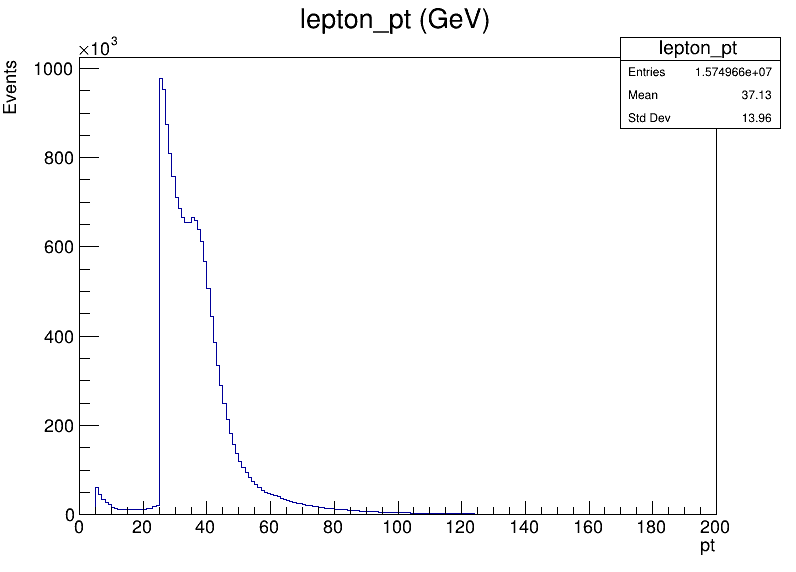

In [12]:
Hist_lepton_pt->Draw("");
canvas->Draw();

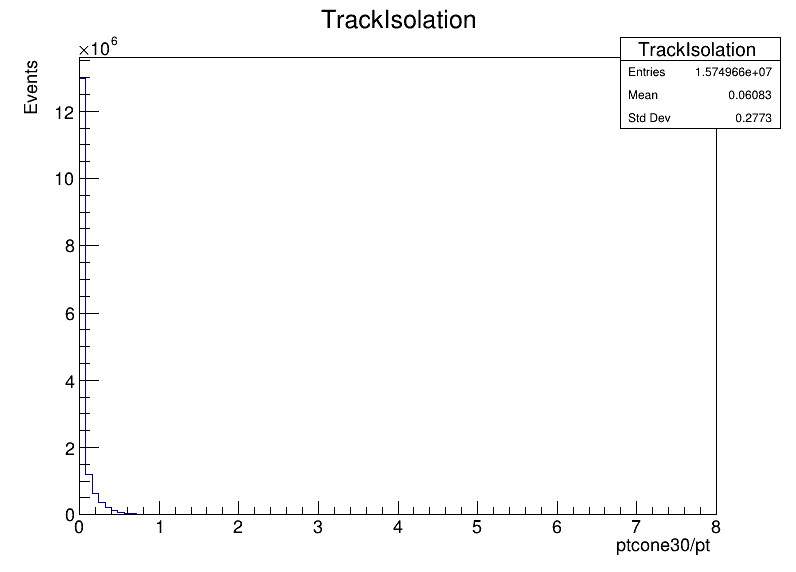

In [13]:
Hist_TrackIsolation ->Draw("");
canvas->Draw();

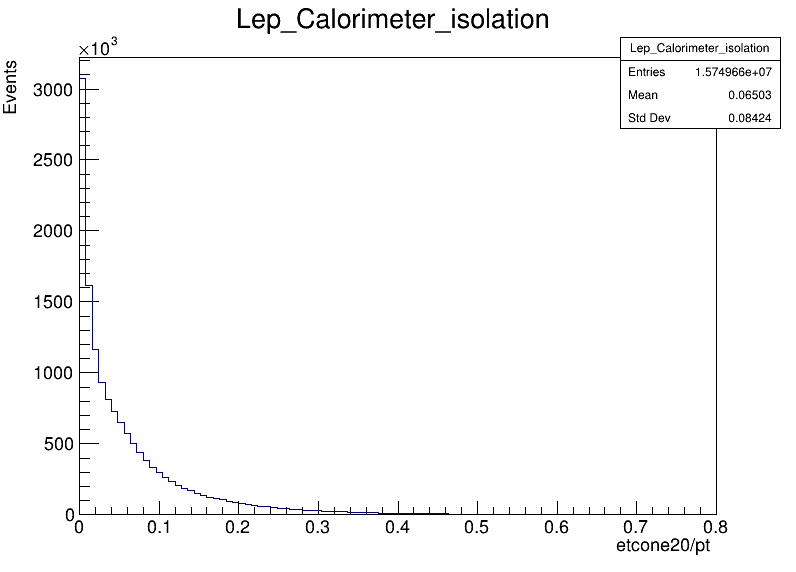

In [14]:
Hist_Lep_Calorimeter_isolation->Draw("");
canvas->Draw();

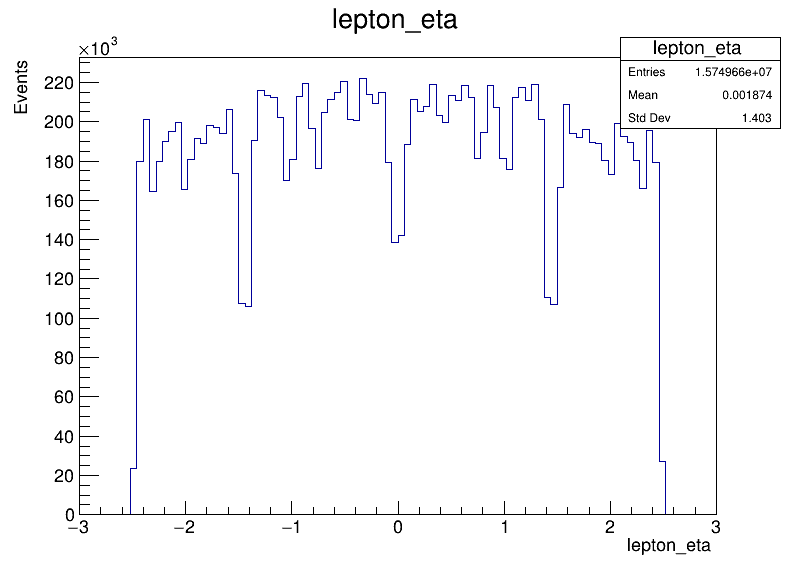

In [15]:
Hist_lepton_eta->Draw("");
canvas->Draw();

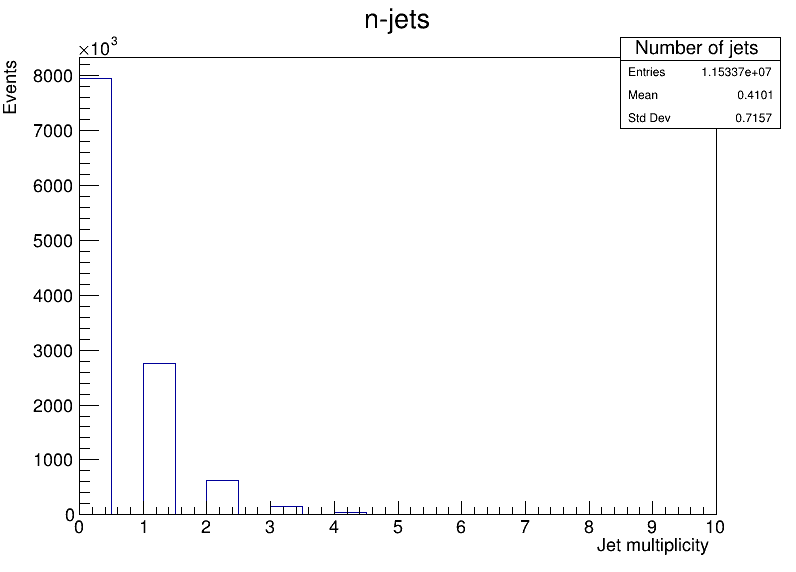

In [16]:
hist_njets->Draw();
canvas->Draw();

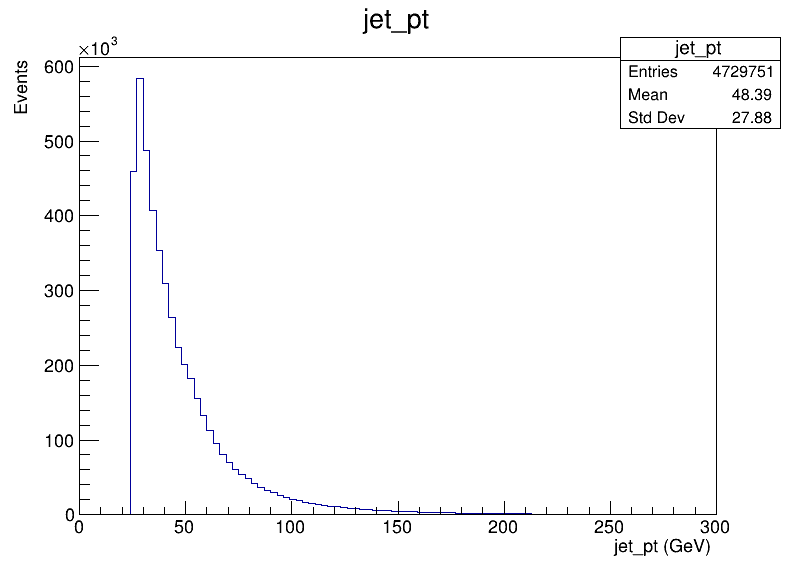

In [17]:
Hist_jet_pt ->Draw();
canvas->Draw(); 

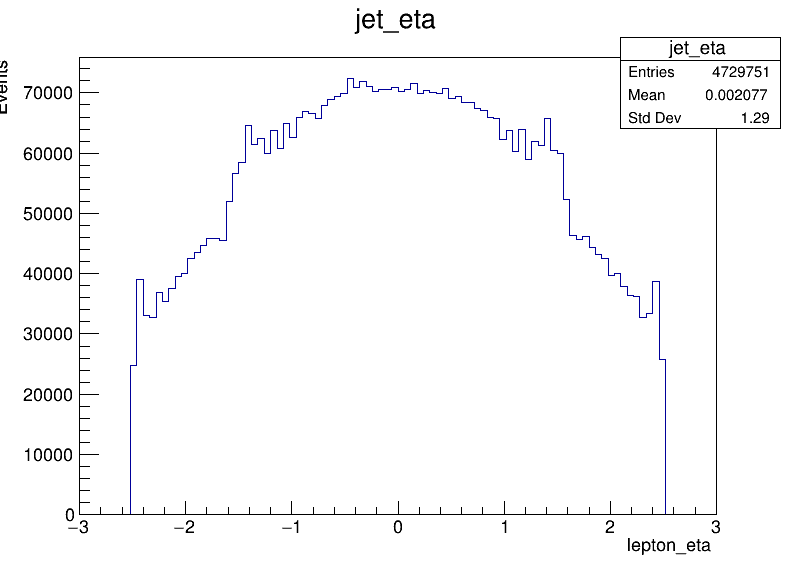

In [18]:
Hist_jet_eta ->Draw();
canvas->Draw();

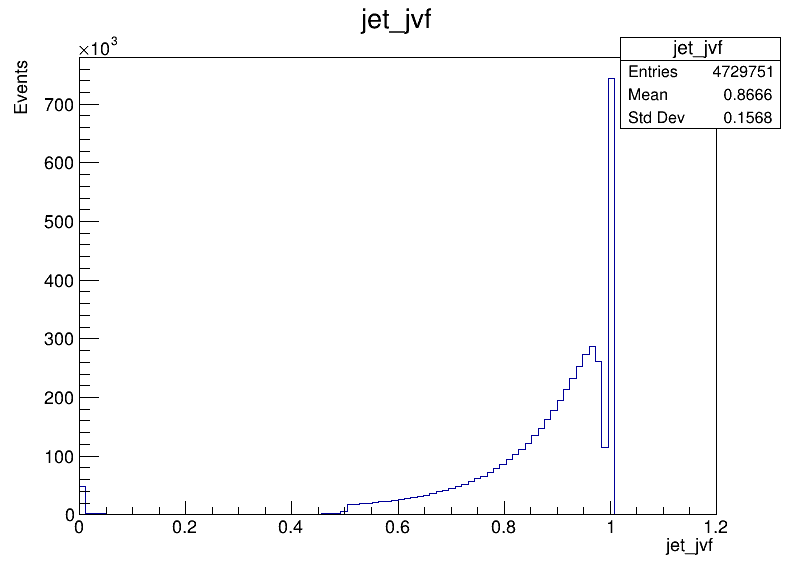

In [19]:
Hist_jet_jvf ->Draw();
canvas->Draw();

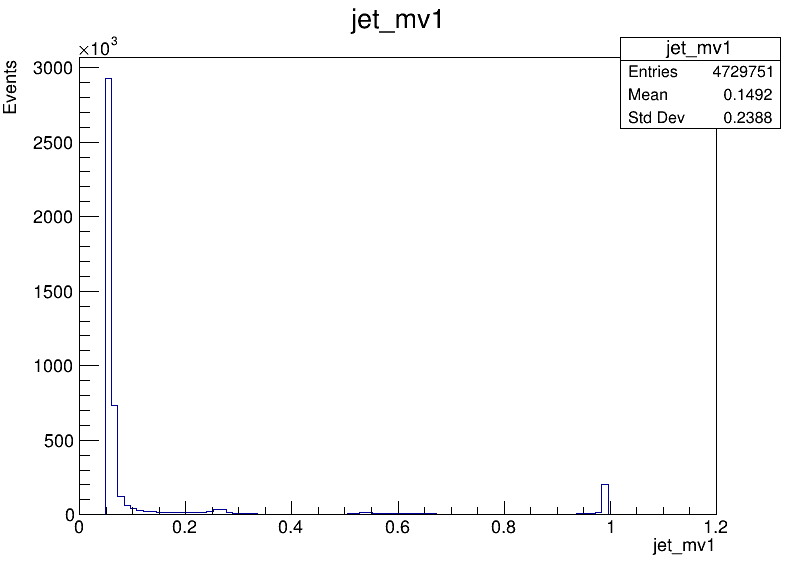

In [20]:
Hist_jet_mv1->Draw();
canvas->Draw();

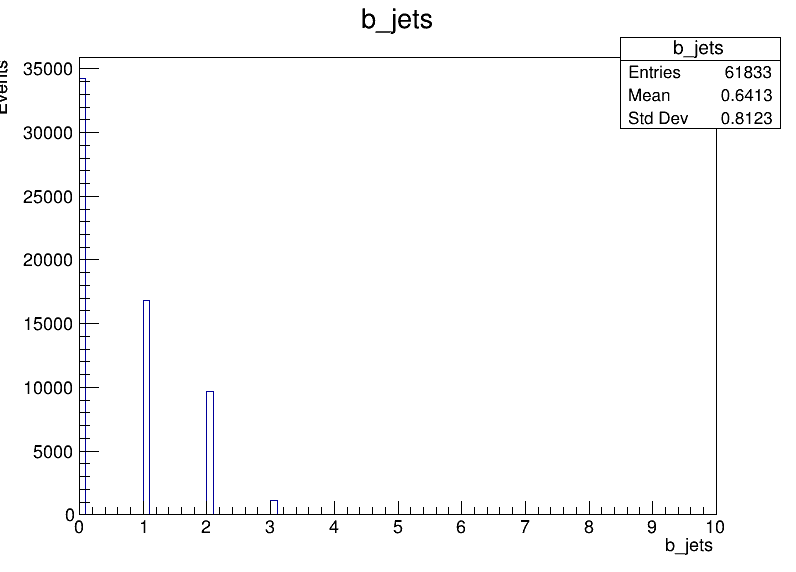

In [21]:
Hist_b_jets->Draw("");
canvas->Draw();

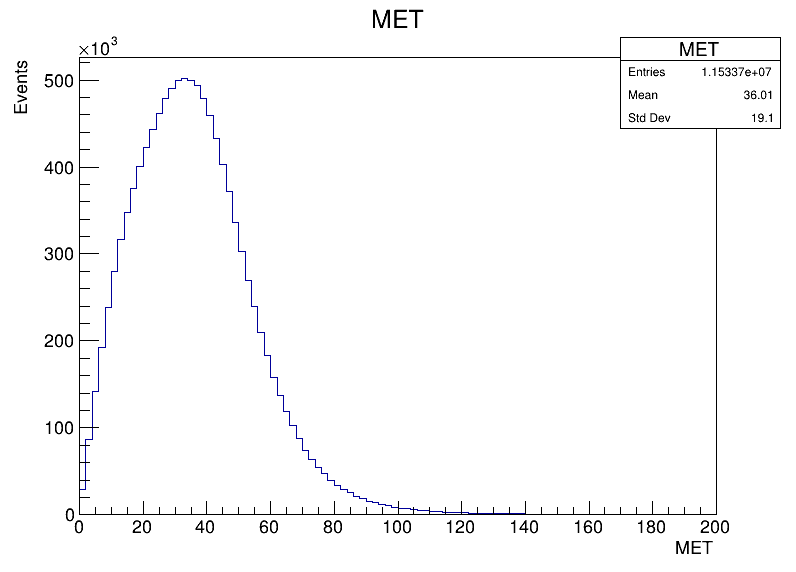

In [22]:
Hist_MET ->Draw("");
canvas->Draw();

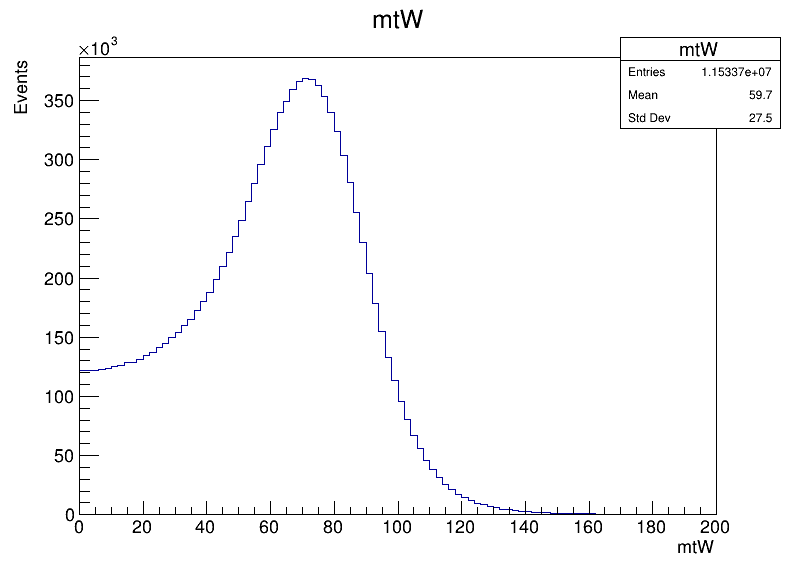

In [23]:
Hist_mtW ->Draw("");
canvas->Draw();

<p>Draw</p>

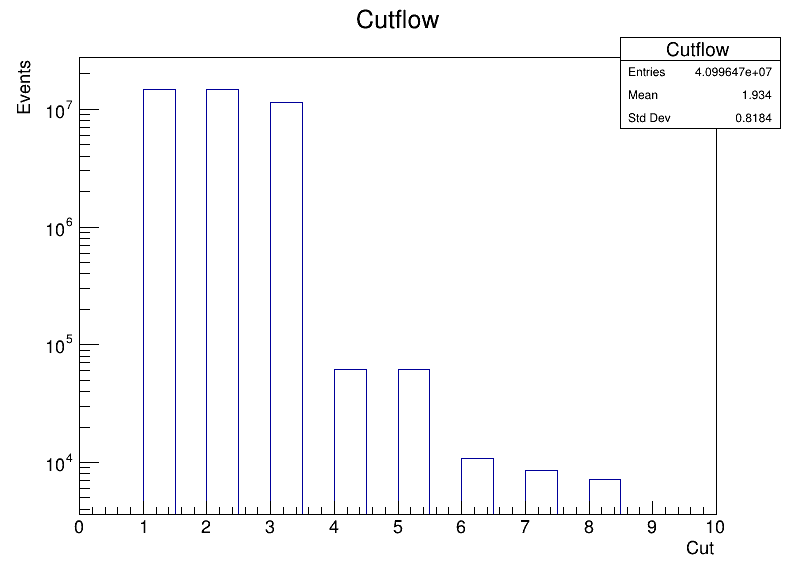

In [24]:
cutflow->Draw("");
canvas->SetLogy();
canvas->Draw();

## Comparemos el antes y despues

Hist_lepton_pt->Draw("");
canvas->Draw();
Hist_TrackIsolation ->Draw("");
canvas->Draw();
Hist_Lep_Calorimeter_isolation->Draw("");
canvas->Draw();
Hist_lepton_eta->Draw("");
canvas->Draw();
hist_njets->Draw();
canvas->Draw();
Hist_jet_pt ->Draw();
canvas->Draw(); 
Hist_jet_eta ->Draw();
canvas->Draw();
Hist_jet_jvf ->Draw();
canvas->Draw();
Hist_jet_mv1->Draw();
canvas->Draw();
Hist_b_jets->Draw("");
canvas->Draw();
Hist_MET ->Draw("");
canvas->Draw();
Hist_mtW ->Draw("");
canvas->Draw();

In [25]:
TCanvas *canvas = new TCanvas("Canvas","",800,600);

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


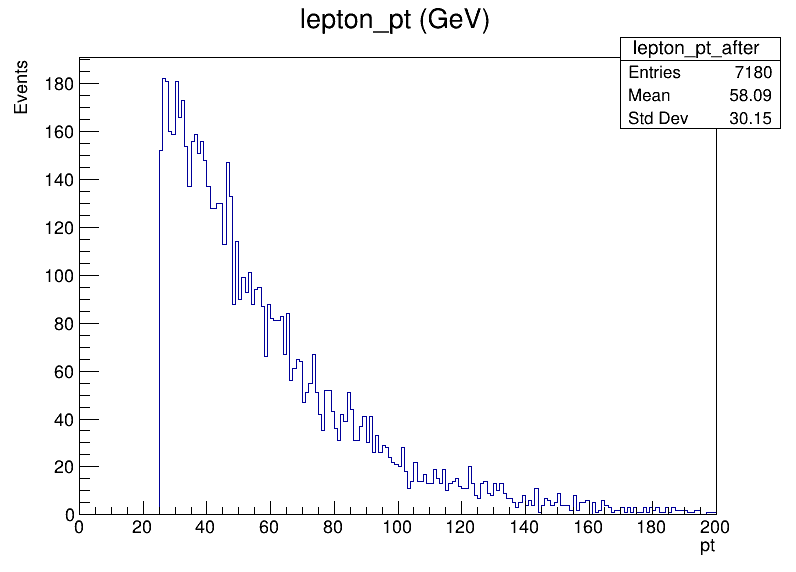

In [26]:
Hist_lepton_pt_after->SetMarkerStyle(20);
Hist_lepton_pt_after->SetMarkerColor(kRed);
Hist_lepton_pt_after->Draw("");
canvas->Draw();

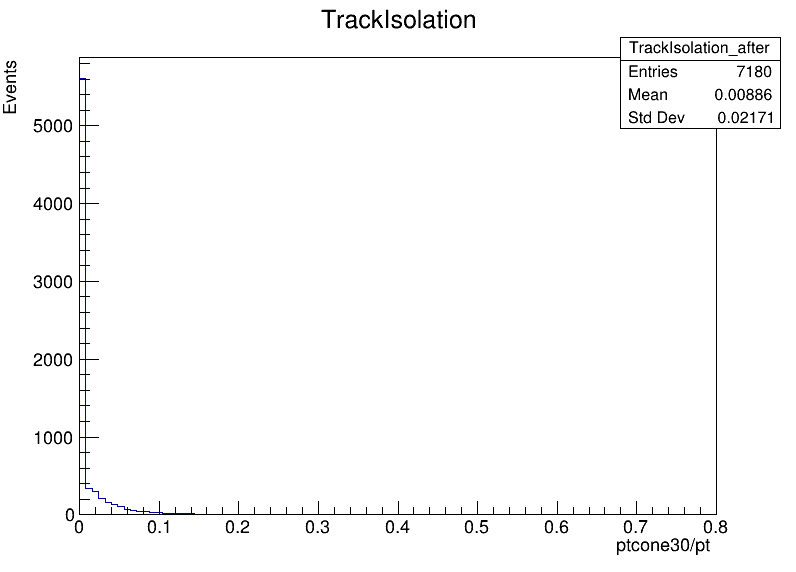

In [27]:
Hist_TrackIsolation_after ->Draw("");
canvas->Draw();

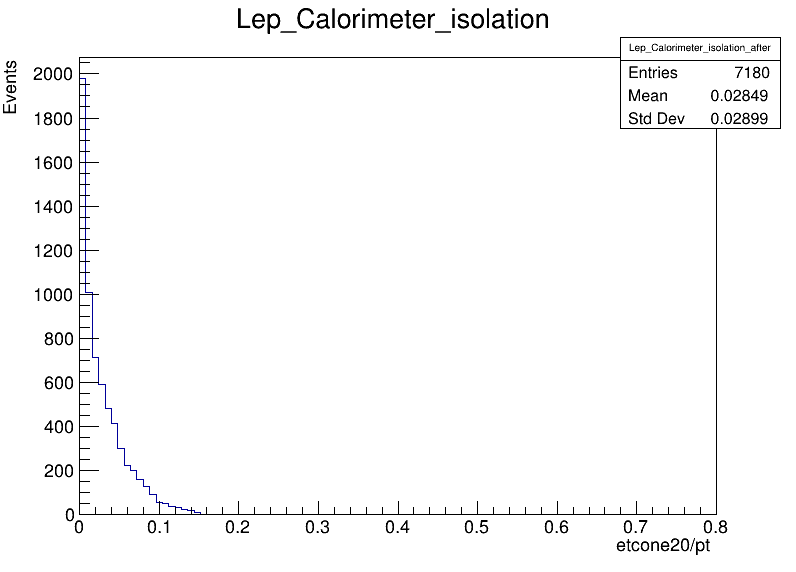

In [28]:
Hist_Lep_Calorimeter_isolation_after->Draw("");
canvas->Draw();

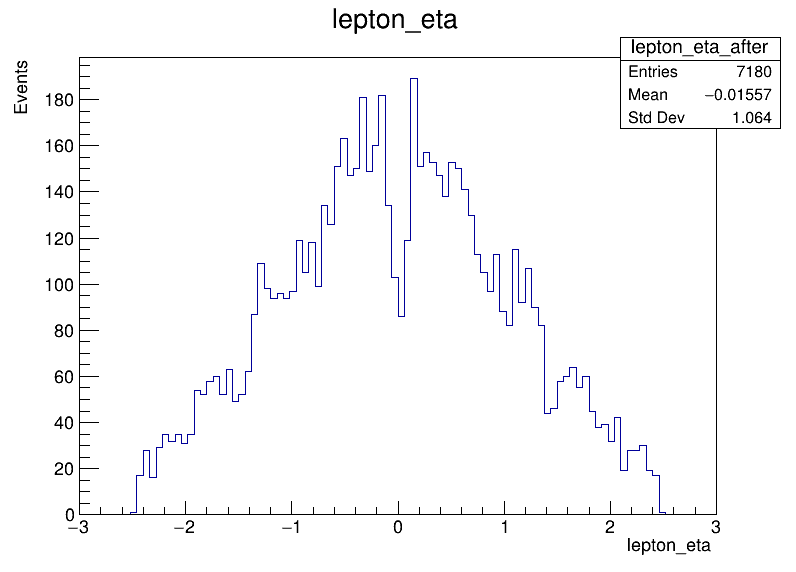

In [29]:
Hist_lepton_eta_after->Draw("");
canvas->Draw();

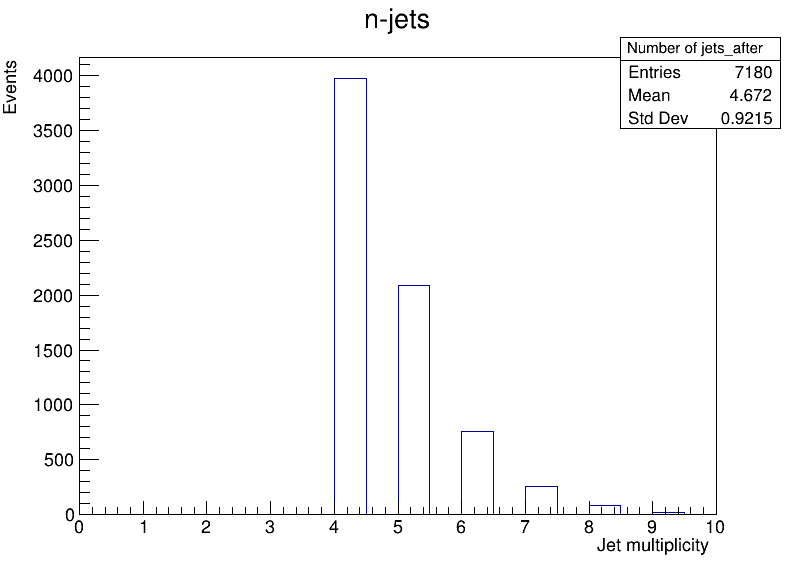

In [30]:
hist_njets_after->Draw();
canvas->Draw();

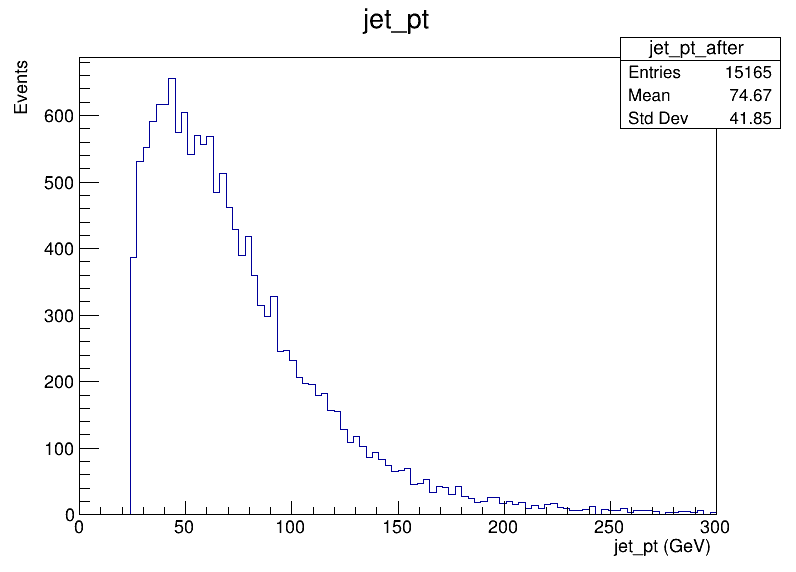

In [31]:
Hist_jet_pt_after ->Draw();
canvas->Draw(); 

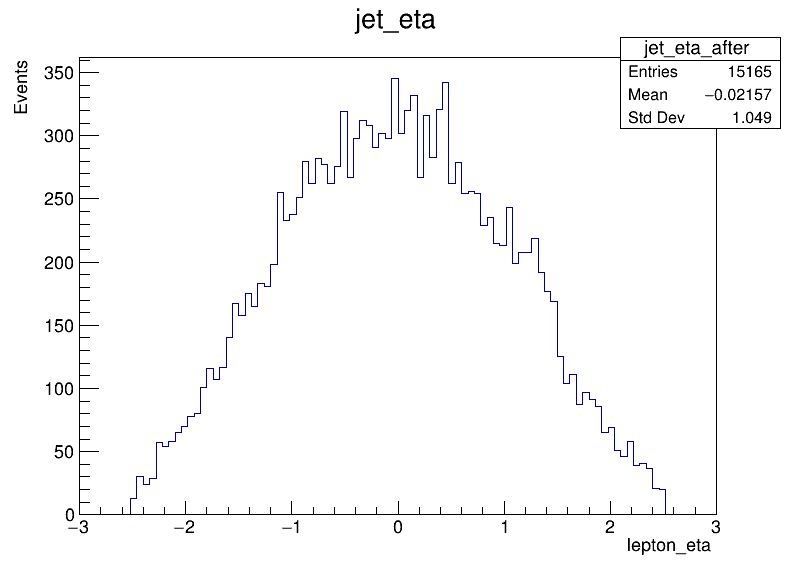

In [32]:
Hist_jet_eta_after ->Draw();
canvas->Draw();

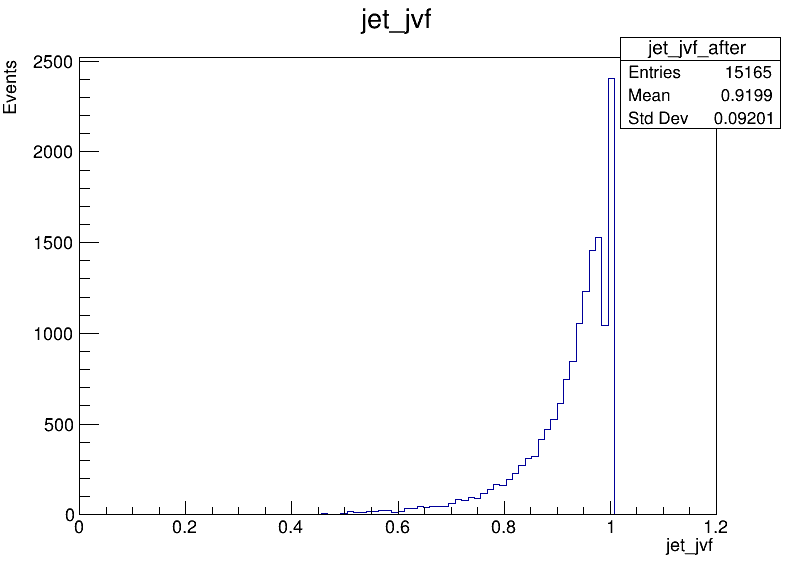

In [33]:
Hist_jet_jvf_after ->Draw();
canvas->Draw();

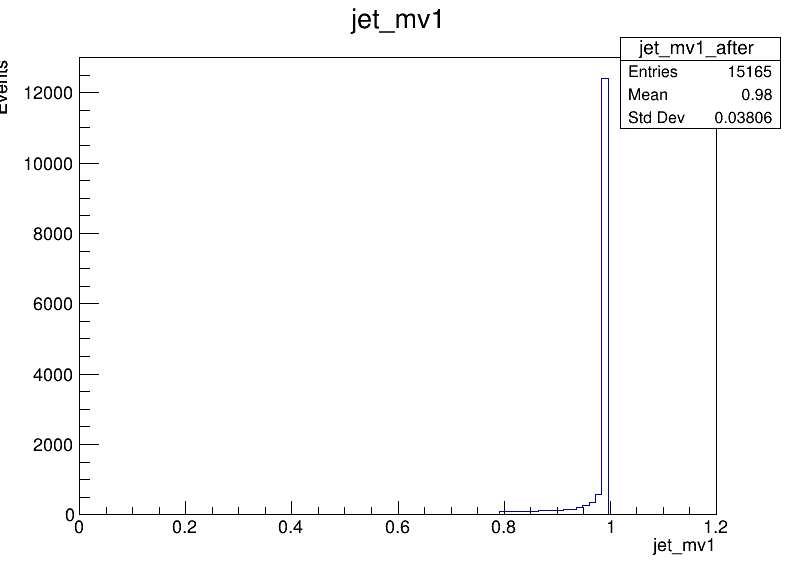

In [34]:
Hist_jet_mv1_after->Draw();
canvas->Draw();

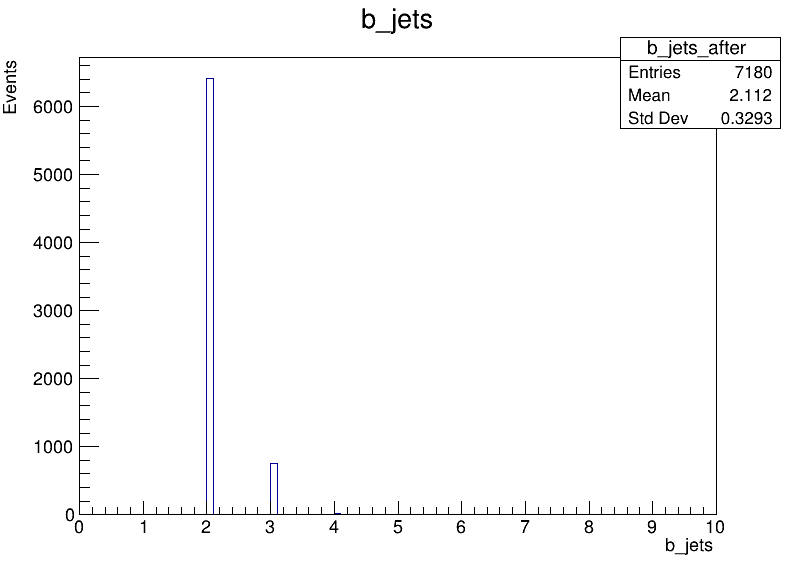

In [35]:
Hist_b_jets_after->Draw("");
canvas->Draw();

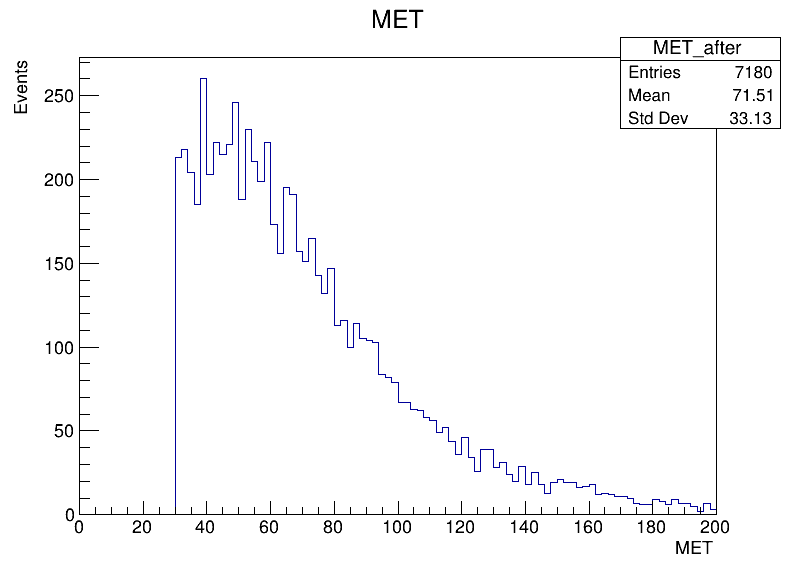

In [36]:
Hist_MET_after ->Draw("");
canvas->Draw();

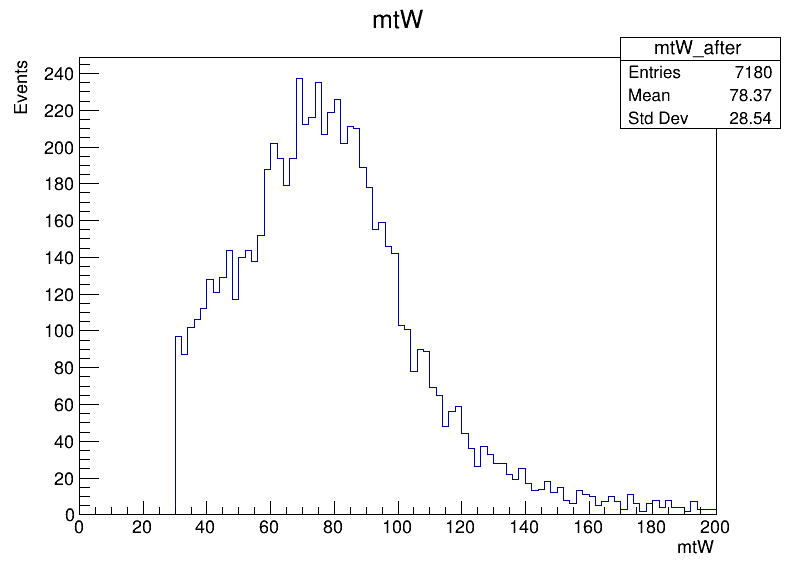

In [37]:
Hist_mtW_after ->Draw("");
canvas->Draw();

## Veamos el Monte Carlo

TFile *file = TFile::Open("Data_8TeV.root"); 

TTree *tree = (TTree*) file->Get("mini");
tree->Print()

TFile *file2 = TFile::Open("ttbar_8TeV.root"); 
TTree *tree2 = (TTree*) file2->Get("mini");
tree2->Print("2") // si lo dejo abajo muere al correr

In [38]:
Float_t scaleFactor_PILEUP ;
Float_t scaleFactor_ELE ;
Float_t scaleFactor_MUON ;
Float_t scaleFactor_TRIGGER ;
Float_t scaleFactor_ZVERTEX ;
Float_t scaleFactor_BTAG ;

Float_t MT_mcWeight;
Bool_t MT_e_trig;
Bool_t MT_mu_trig;
Bool_t MT_good_vtx;
UInt_t MT_lep_n;
UInt_t MT_jet_n;
Float_t MT_MET;
Float_t MT_MET_phi;

Float_t MT_lep_pt[10];  
Float_t MT_lep_eta[10];  
Float_t MT_lep_phi[10];  
Float_t MT_lep_E[10];  
Int_t MT_lep_type[10];  
Float_t MT_lep_ptcone30[10];
Float_t MT_lep_etcone20[10];

Float_t MT_jet_pt[10]; 
Float_t MT_jet_Eta[10]; 
Float_t MT_jet_jvf[10]; 
Float_t MT_jet_mv1[10];

tree2->SetBranchAddress("scaleFactor_PILEUP", &scaleFactor_PILEUP);
tree2->SetBranchAddress("scaleFactor_ELE", &scaleFactor_ELE);
tree2->SetBranchAddress("scaleFactor_MUON", &scaleFactor_MUON);
tree2->SetBranchAddress("scaleFactor_TRIGGER", &scaleFactor_TRIGGER);
tree2->SetBranchAddress("scaleFactor_ZVERTEX", &scaleFactor_ZVERTEX);
tree2->SetBranchAddress("scaleFactor_BTAG", &scaleFactor_BTAG);

tree2->SetBranchAddress("trigE", &MT_e_trig);
tree2->SetBranchAddress("trigM", &MT_mu_trig);
tree2->SetBranchAddress("hasGoodVertex", &MT_good_vtx);
tree2->SetBranchAddress("lep_n", &MT_lep_n);
tree2->SetBranchAddress("jet_n", &MT_jet_n);
tree2->SetBranchAddress("met_et", &MT_MET);
tree2->SetBranchAddress("met_phi", &MT_MET_phi);

tree2->SetBranchAddress("lep_pt", &MT_lep_pt);
tree2->SetBranchAddress("lep_eta", &MT_lep_eta);
tree2->SetBranchAddress("lep_phi", &MT_lep_phi);
tree2->SetBranchAddress("lep_E", &MT_lep_E);
tree2->SetBranchAddress("lep_type", &MT_lep_type);
tree2->SetBranchAddress("lep_ptcone30", &MT_lep_ptcone30);
tree2->SetBranchAddress("lep_etcone20", &MT_lep_etcone20);

tree2->SetBranchAddress("jet_pt", &MT_jet_pt);

tree2->SetBranchAddress("mcWeight", &mcWeight);

tree2->SetBranchAddress("jet_eta", &MT_jet_Eta);
tree2->SetBranchAddress("jet_jvf", &MT_jet_jvf);
tree2->SetBranchAddress("jet_MV1", &MT_jet_mv1);

In [39]:
TCanvas *canvas2 = new TCanvas("Canvas2","",800,600);

In [72]:
TH1F *MT_cutflow = new TH1F("MT-Cutflow","MT-Cutflow; Cut; Events",20,0,10);
TH1F *MT_hist_njets = new TH1F("MT-Number of jets","MT-n-jets; Jet multiplicity; Events",20,0,10);

TH1F *MT_Hist_lepton_pt = new TH1F("MT-lepton_pt","MT-lepton_pt (GeV); pt; Events",200,0,200);
TH1F *MT_Hist_TrackIsolation = new TH1F("MT-TrackIsolation","MT-TrackIsolation; ptcone30/pt; Events",100,0,0.8);
TH1F *MT_Hist_Lep_Calorimeter_isolation = new TH1F("MT-Lep_Calorimeter_isolation","MT-Lep_Calorimeter_isolation; etcone20/pt; Events",100,0,0.8);
TH1F *MT_Hist_lepton_eta = new TH1F("MT-lepton_eta","MT-lepton_eta; lepton_eta; Events",100,-3,3);

TH1F *MT_Hist_jet_pt = new TH1F("MT-jet_pt","MT-jet_pt; jet_pt (GeV); Events",100,0,300);
TH1F *MT_Hist_jet_eta = new TH1F("MT-jet_eta","MT-jet_eta; lepton_eta; Events",100,-3,3);
TH1F *MT_Hist_jet_jvf = new TH1F("MT-jet_jvf","MT-jet_jvf; jet_jvf; Events",100,0,1.2);
TH1F *MT_Hist_jet_mv1 = new TH1F("MT-jet_mv1","MT-jet_mv1; jet_mv1; Events",100,0,1.2);

TH1F *MT_Hist_b_jets = new TH1F("MT-b_jets","MT-b_jets; b_jets; Events",100,0,10);
TH1F *MT_Hist_MET = new TH1F("MT-MET","MT-MET; MET; Events",100,0,200);
TH1F *MT_Hist_mtW = new TH1F("MT-mtW","MT-mtW; mtW; Events",100,0,200);

Warning in <TFile::Append>: Replacing existing TH1: MT-Cutflow (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: MT-Number of jets (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: MT-lepton_pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: MT-TrackIsolation (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: MT-Lep_Calorimeter_isolation (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: MT-lepton_eta (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: MT-jet_pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: MT-jet_eta (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: MT-jet_jvf (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: MT-jet_mv1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: MT-b_jets (Potential memory leak

In [73]:
// Float_t scaleFactor = scaleFactor_ELE*scaleFactor_MUON*scaleFactor_TRIGGER*scaleFactor_PILEUP*scaleFactor_ZVERTEX  ;

// histograma ->Scale();

In [74]:
int nentries, nbytes, i;
nentries = (Int_t)tree2->GetEntries();

float old_nentries = (Int_t)tree->GetEntries();
int bbb=1000;

float sumw = 49761200.21 ;
float xsec = 137.29749;
float red_eff = 0.072212854;
float P_Weight =  (bbb*xsec)/(sumw*red_eff) ;
//float aa =  (nentries*xsec)/(sumw*red_eff) ;
//float P_Weight =  1/aa ;


int cut1 = 0;
int cut2 = 0;
int cut3 = 0;
int cut4 = 0;
int cut5 = 0;
int cut6 = 0;
int cut7 = 0;
int cut8 = 0;


for (i = 0; i < nentries; i++)
{
    nbytes = tree2->GetEntry(i);   

    if(!MT_good_vtx) continue;
    cut1++;
    MT_cutflow->Fill(1);

    if(!MT_e_trig && !MT_mu_trig) continue;
    cut2++;
    MT_cutflow->Fill(2);
        
    int n_mu=0;
    int n_el=0;
    int n_lep=0;
    int misst=0; //conteo de los de energia perdida
    
    for(unsigned int i=0; i<MT_lep_n; i++){ 

        if( MT_lep_pt[i] < 25000.) continue; 
        if( MT_lep_ptcone30[i]/MT_lep_pt[i] > 0.15 ) continue; 
        if( MT_lep_etcone20[i]/MT_lep_pt[i] > 0.15 ) continue;  
        if( MT_lep_type [i]==13 && TMath::Abs(MT_lep_eta[i]) < 2.5 ){n_mu++;n_lep++;
        }
        if( MT_lep_type [i]==11 && (TMath::Abs(MT_lep_eta[i]) < 1.37 || TMath::Abs(MT_lep_eta[i])> 1.52) && TMath::Abs(MT_lep_eta[i]) < 2.47 )
        { n_el++;n_lep++;  
        }

    }

    if(n_lep!=1) continue;
    MT_cutflow->Fill(3); 
    cut3++;
    
    int n_jets=0;
    int n_bjets=0;  
    
    TLorentzVector Lepton  = TLorentzVector();
    TLorentzVector  MeT  = TLorentzVector();

    
    Lepton.SetPtEtaPhiE(MT_lep_pt[0],MT_lep_eta[0],MT_lep_phi[0],MT_lep_E[0]); 
    MeT.SetPtEtaPhiE(MT_MET,0,MT_MET_phi,MT_MET); 
          
    float mTW = sqrt(2*Lepton.Pt()*MeT.Et()*(1-cos(Lepton.DeltaPhi(MeT))));

    
    
    if(MT_jet_n<4) continue; 
    MT_cutflow->Fill(4); 
    cut4++;
    
    
    for(unsigned int j=0; j<MT_jet_n; j++){ //llenemos primero los histogramas ANTES del cut
         
        if(MT_jet_pt[j] < 25000. ) continue;
      if(TMath::Abs(MT_jet_Eta[j]) > 2.5 ) continue;   
        if(TMath::Abs(MT_jet_Eta[j]) <= 2.4 && MT_jet_pt[j] <= 50000. && MT_jet_jvf[j] < 0.5) continue;
        n_jets++;
        if(MT_jet_mv1[j] > 0.7892){n_bjets++;}
        }
    
//    MT_Hist_b_jets->Fill(n_bjets);  
    if(n_jets<4) continue; 
    MT_cutflow->Fill(5); 
    cut5++;
    
    if(n_bjets<2) continue;
    MT_cutflow->Fill(6); 
    cut6++;
    
    if(MT_MET<30000.) continue;
    MT_cutflow->Fill(7); 
    cut7++;                                                           

    if(mTW < 30000.) continue;
    MT_cutflow->Fill(8); 
    cut8++;
 
        //FACTOR DE ESCALA
    Float_t scaleFactor = scaleFactor_ELE*scaleFactor_MUON*scaleFactor_TRIGGER*scaleFactor_PILEUP*scaleFactor_ZVERTEX  ;

    // voy a llenar los histogrammas luego de los cortes
    MT_hist_njets->Fill(MT_jet_n,scaleFactor*P_Weight);  
//    MT_hist_njets->Fill(MT_jet_n,scaleFactor*P_Weight);  
    MT_Hist_MET->Fill(MT_MET/1000.,scaleFactor*P_Weight) ;
    MT_Hist_mtW ->Fill(mTW/1000.,scaleFactor*P_Weight) ;
    MT_Hist_b_jets ->Fill(n_bjets,scaleFactor*P_Weight);  

    //leptones
    for(unsigned int l=0; l<MT_lep_n; l++){ 
        
        if( MT_lep_pt[l] < 25000.) continue; 
        if( MT_lep_ptcone30[l]/MT_lep_pt[l] > 0.15 ) continue; 
        if( MT_lep_etcone20[l]/MT_lep_pt[l] > 0.15 ) continue;  
        if( MT_lep_type [l]==13 && TMath::Abs(MT_lep_eta[l]) < 2.5 ){
        MT_Hist_lepton_pt->Fill(MT_lep_pt[l]/1000.,scaleFactor*P_Weight);    
        MT_Hist_TrackIsolation ->Fill(MT_lep_ptcone30[l]/MT_lep_pt[l],scaleFactor*P_Weight);
        MT_Hist_Lep_Calorimeter_isolation ->Fill(MT_lep_etcone20[l]/MT_lep_pt[l],scaleFactor*P_Weight);
        MT_Hist_lepton_eta ->Fill(MT_lep_eta[l],scaleFactor*P_Weight);            
        }
        if( MT_lep_type [l]==11 && (TMath::Abs(MT_lep_eta[l]) < 1.37 || TMath::Abs(MT_lep_eta[l])> 1.52) && TMath::Abs(MT_lep_eta[l]) < 2.47)
        { 
        MT_Hist_lepton_pt->Fill(MT_lep_pt[l]/1000.,scaleFactor*P_Weight);  
        MT_Hist_TrackIsolation ->Fill(MT_lep_ptcone30[l]/MT_lep_pt[l],scaleFactor*P_Weight);
        MT_Hist_Lep_Calorimeter_isolation ->Fill(MT_lep_etcone20[l]/MT_lep_pt[l],scaleFactor*P_Weight);
        MT_Hist_lepton_eta ->Fill(MT_lep_eta[l],scaleFactor*P_Weight);            
        }
    }
        //Jets 
        for(unsigned int h=0; h<MT_jet_n; h++){ 
        if(MT_jet_pt[h] < 25000. ) continue;
      if(TMath::Abs(MT_jet_Eta[h]) > 2.5 ) continue;   
        if(TMath::Abs(MT_jet_Eta[h]) <= 2.4 && MT_jet_pt[h] <= 50000. && MT_jet_jvf[h] < 0.5) continue;
        if(MT_jet_mv1[h] > 0.7892){
            MT_Hist_jet_pt  ->Fill(MT_jet_pt[h]/1000.,scaleFactor*P_Weight); 
            MT_Hist_jet_eta ->Fill(MT_jet_Eta[h],scaleFactor*P_Weight); 
            MT_Hist_jet_jvf ->Fill(MT_jet_jvf[h],scaleFactor*P_Weight); 
            MT_Hist_jet_mv1 ->Fill(MT_jet_mv1[h],scaleFactor*P_Weight); 
            }  
        }
    
//  if(i%10000==0){ std::cout << "MT_mcWeight:" << MT_mcWeight << std::endl; }  
    
}

std::cout << "Done!" << std::endl;
std::cout << "All events:" << nentries << std::endl;
std::cout << "Cut1:" << cut1 << std::endl;
std::cout << "Cut2:" << cut2 << std::endl;
std::cout << "Cut3:" << cut3 << std::endl;
std::cout << "Cut4:" << cut4 << std::endl;
std::cout << "Cut5:" << cut5 << std::endl;
std::cout << "Cut6:" << cut6 << std::endl;
std::cout << "Cut7:" << cut7 << std::endl;
std::cout << "Cut8:" << cut8 << std::endl;
std::cout << "P_Weight:" << P_Weight << std::endl;
//std::cout << "old_nentries:" << old_nentries << std::endl;

Done!
All events:1500000
Cut1:1499487
Cut2:1499487
Cut3:1336214
Cut4:623273
Cut5:622125
Cut6:259904
Cut7:214514
Cut8:180970
P_Weight:0.0382083


MT_Hist_lepton_pt->Draw("");
canvas2->Draw();
MT_Hist_TrackIsolation ->Draw("");
canvas2->Draw();
MT_Hist_Lep_Calorimeter_isolation->Draw("");
canvas2->Draw();
MT_Hist_lepton_eta->Draw("");
canvas2->Draw();
MT_hist_njets->Draw();
canvas2->Draw();
MT_Hist_jet_pt ->Draw();
canvas2->Draw(); 
MT_Hist_jet_eta ->Draw();
canvas2->Draw();
MT_Hist_jet_jvf ->Draw();
canvas2->Draw();
MT_Hist_jet_mv1->Draw();
canvas2->Draw();
MT_Hist_b_jets->Draw("");
canvas2->Draw();
MT_Hist_MET ->Draw("");
canvas2->Draw();
MT_Hist_mtW ->Draw("");
canvas2->Draw();

In [75]:
TCanvas *canvas2 = new TCanvas("Canvas2","",800,600);

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas2


In [76]:
//TCanvas *canvas3 = new TCanvas("Canvas3","",800,600);

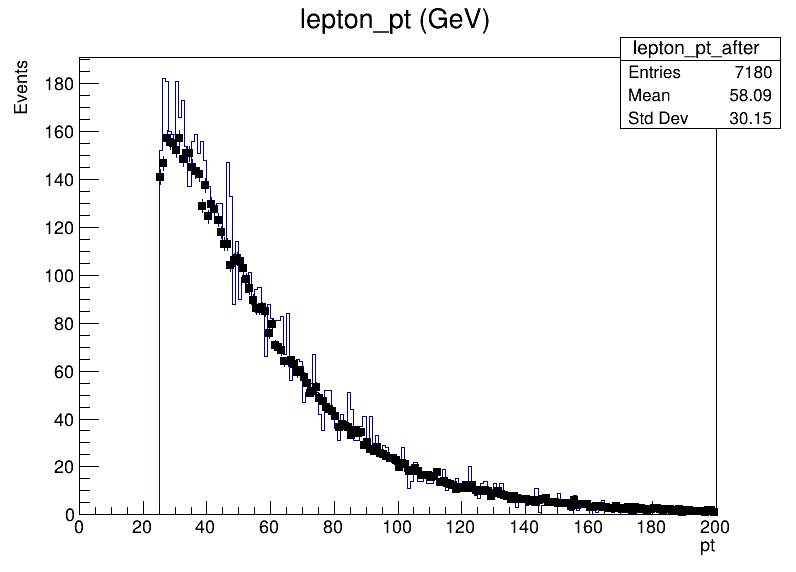

In [77]:
Hist_lepton_pt_after->SetMarkerStyle(20);
Hist_lepton_pt_after->SetMarkerColor(kRed);
Hist_lepton_pt_after->Draw("");
MT_Hist_lepton_pt->SetMarkerStyle(21);
MT_Hist_lepton_pt->SetMarkerColor(kBlack);
MT_Hist_lepton_pt->Draw("same");
canvas2->Draw();

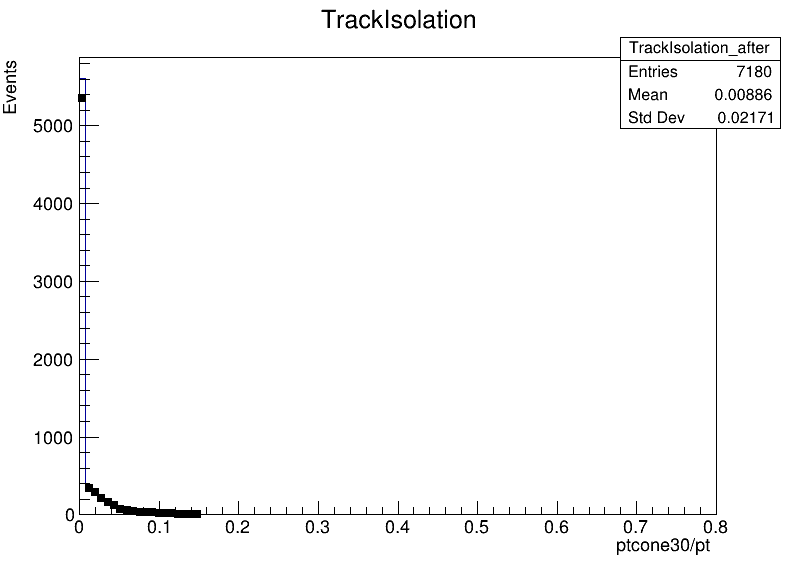

In [78]:
TrackIsolation_after->SetMarkerStyle(20);
TrackIsolation_after->SetMarkerColor(kRed);
TrackIsolation_after->Draw("");
MT_Hist_TrackIsolation->SetMarkerStyle(21);
MT_Hist_TrackIsolation->SetMarkerColor(kBlack);
MT_Hist_TrackIsolation->Draw("same");
canvas2->Draw();

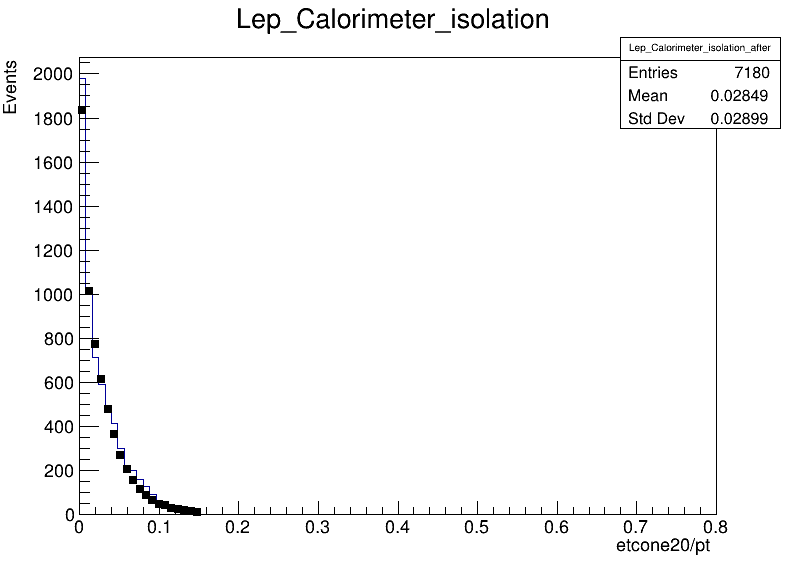

In [79]:
Hist_Lep_Calorimeter_isolation_after->SetMarkerStyle(20);
Hist_Lep_Calorimeter_isolation_after->SetMarkerColor(kRed);
Hist_Lep_Calorimeter_isolation_after->Draw("");
MT_Hist_Lep_Calorimeter_isolation->SetMarkerStyle(21);
MT_Hist_Lep_Calorimeter_isolation->SetMarkerColor(kBlack);
MT_Hist_Lep_Calorimeter_isolation->Draw("same");
canvas2->Draw();


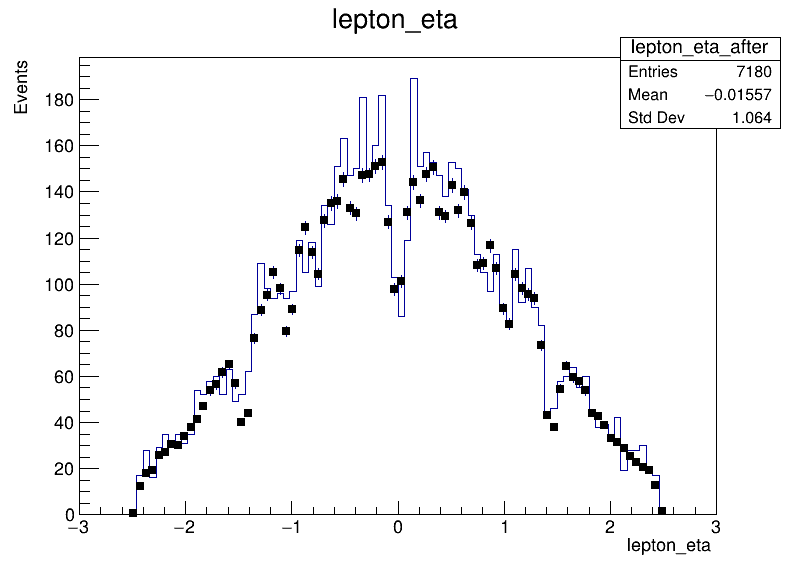

In [80]:
lepton_eta_after->SetMarkerStyle(20);
lepton_eta_after->SetMarkerColor(kRed);
lepton_eta_after->Draw("");
MT_Hist_lepton_eta->SetMarkerStyle(21);
MT_Hist_lepton_eta->SetMarkerColor(kBlack);
MT_Hist_lepton_eta->Draw("same");
canvas2->Draw();

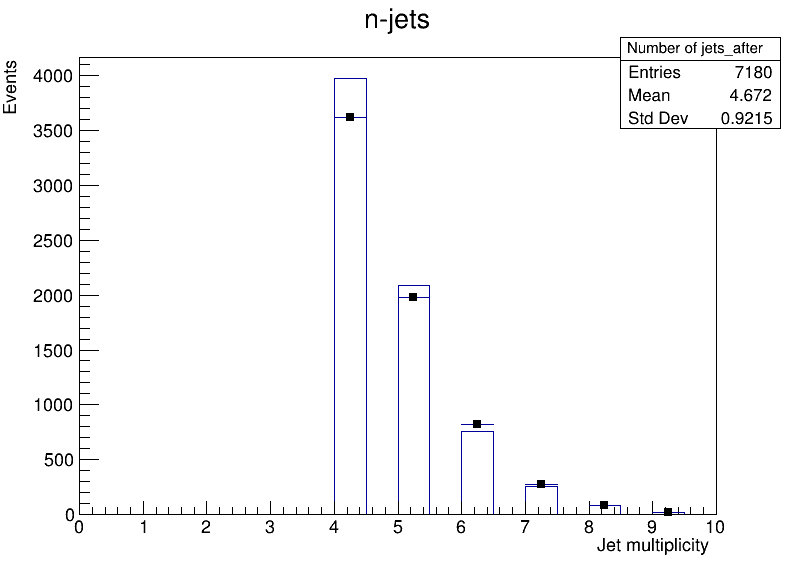

In [81]:
hist_njets_after->SetMarkerStyle(20);
hist_njets_after->SetMarkerColor(kRed);
hist_njets_after->Draw("");
MT_hist_njets->SetMarkerStyle(21);
MT_hist_njets->SetMarkerColor(kBlack);
MT_hist_njets->Draw("same");
canvas2->Draw();

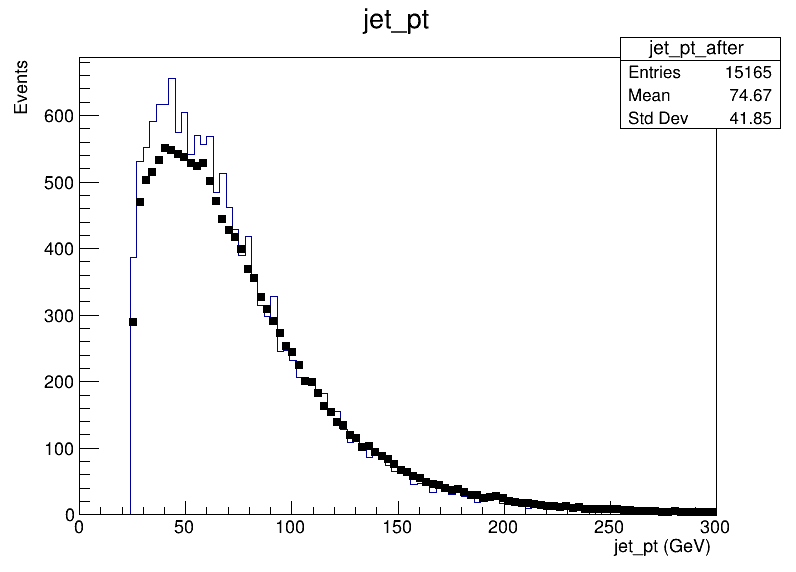

In [82]:
Hist_jet_pt_after->SetMarkerStyle(20);
Hist_jet_pt_after->SetMarkerColor(kRed);
Hist_jet_pt_after->Draw("");
MT_Hist_jet_pt->SetMarkerStyle(21);
MT_Hist_jet_pt->SetMarkerColor(kBlack);
MT_Hist_jet_pt->Draw("same");
canvas2->Draw();

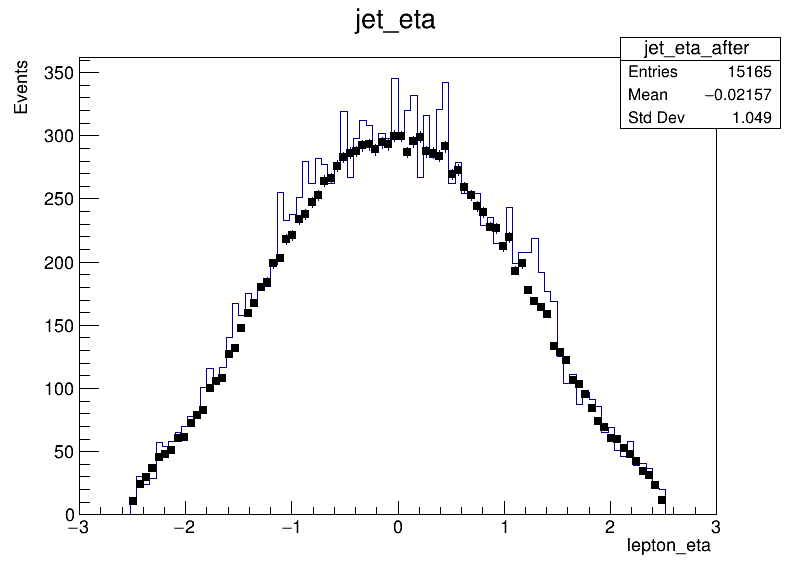

In [83]:
Hist_jet_eta_after->SetMarkerStyle(20);
Hist_jet_eta_after->SetMarkerColor(kRed);
Hist_jet_eta_after->Draw("");
MT_Hist_jet_eta->SetMarkerStyle(21);
MT_Hist_jet_eta->SetMarkerColor(kBlack);
MT_Hist_jet_eta->Draw("same");
canvas2->Draw();


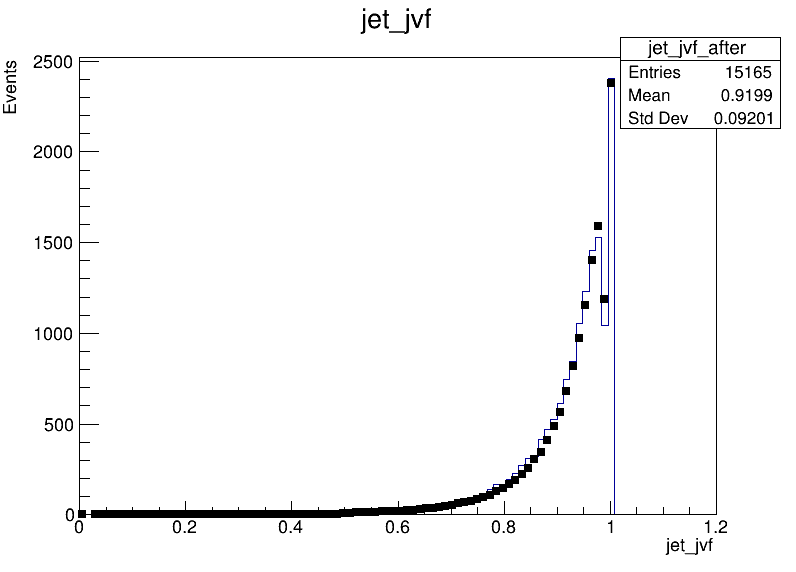

In [84]:
Hist_jet_jvf_after->SetMarkerStyle(20);
Hist_jet_jvf_after->SetMarkerColor(kRed);
Hist_jet_jvf_after->Draw("");
MT_Hist_jet_jvf->SetMarkerStyle(21);
MT_Hist_jet_jvf->SetMarkerColor(kBlack);
MT_Hist_jet_jvf->Draw("same");
canvas2->Draw();

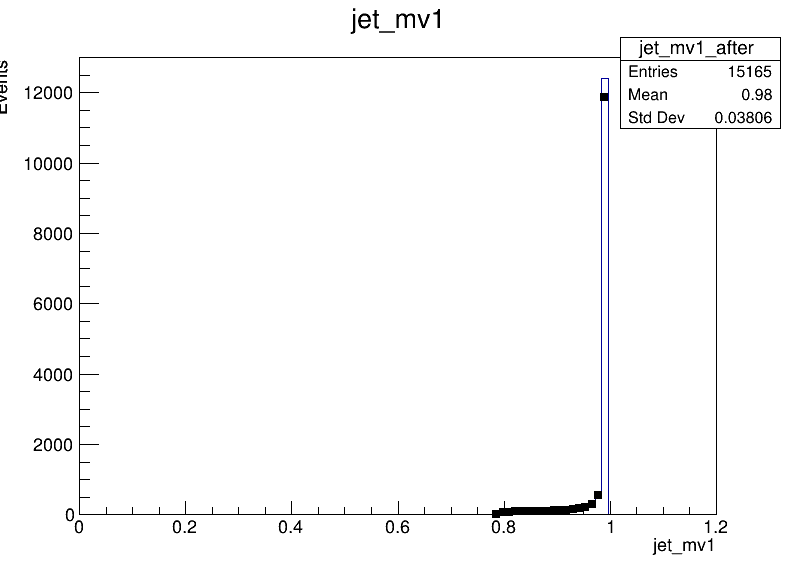

In [85]:
Hist_jet_mv1_after->SetMarkerStyle(20);
Hist_jet_mv1_after->SetMarkerColor(kRed);
Hist_jet_mv1_after->Draw("");
MT_Hist_jet_mv1->SetMarkerStyle(21);
MT_Hist_jet_mv1->SetMarkerColor(kBlack);
MT_Hist_jet_mv1->Draw("same");
canvas2->Draw();

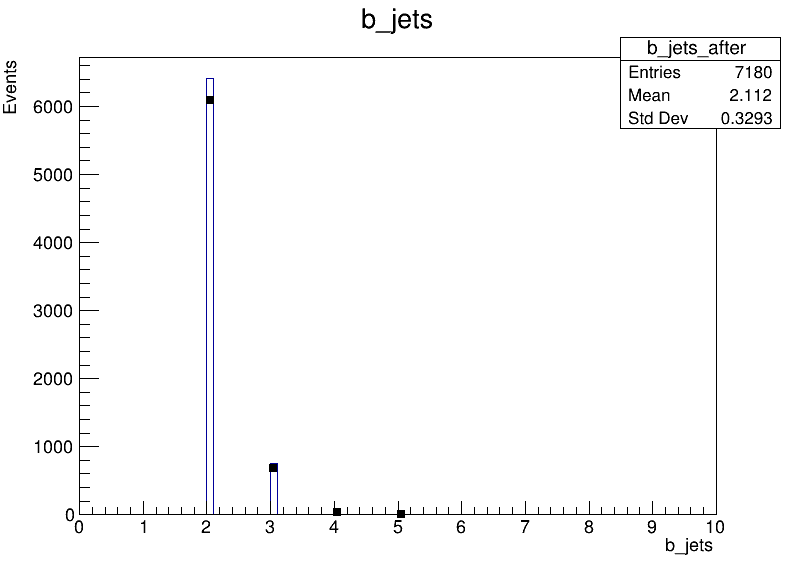

In [86]:
Hist_b_jets_after->SetMarkerStyle(20);
Hist_b_jets_after->SetMarkerColor(kRed);
Hist_b_jets_after->Draw("");
MT_Hist_b_jets->SetMarkerStyle(21);
MT_Hist_b_jets->SetMarkerColor(kBlack);
MT_Hist_b_jets->Draw("same");
canvas2->Draw();


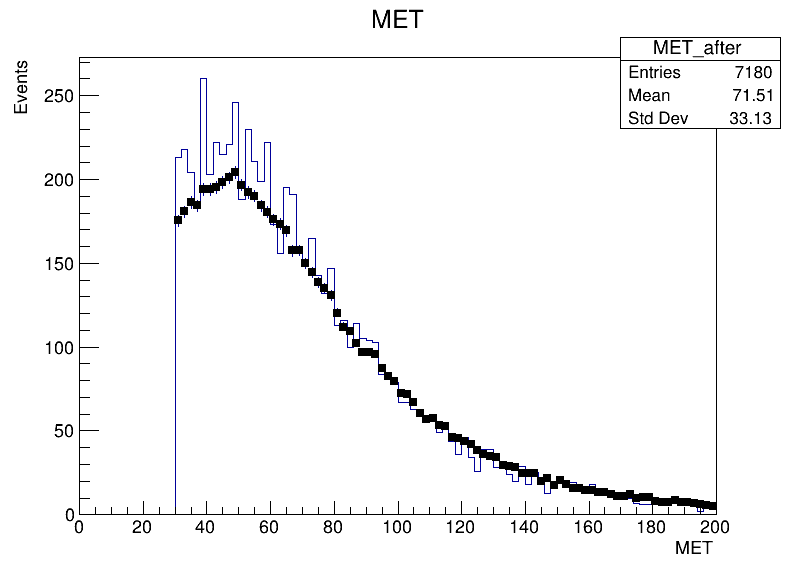

In [87]:
Hist_MET_after->SetMarkerStyle(20);
Hist_MET_after->SetMarkerColor(kRed);
Hist_MET_after->Draw("");
MT_Hist_MET->SetMarkerStyle(21);
MT_Hist_MET->SetMarkerColor(kBlack);
MT_Hist_MET->Draw("same");
canvas2->Draw();

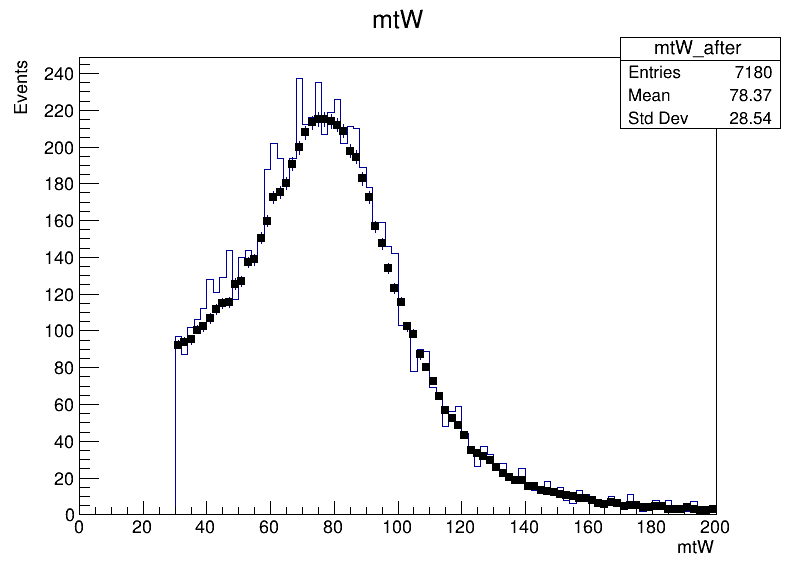

In [88]:
Hist_mtW_after->SetMarkerStyle(20);
Hist_mtW_after->SetMarkerColor(kRed);
Hist_mtW_after->Draw("");
MT_Hist_mtW->SetMarkerStyle(21);
MT_Hist_mtW->SetMarkerColor(kBlack);
MT_Hist_mtW->Draw("same");
canvas2->Draw();